In [12]:
#https://stats.nba.com/events/?flag=3&CFID=33&CFPARAMS=2017-18&PlayerID=204001&ContextMeasure=FGA&Season=2017-18&section=player&sct=hex
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [ ]:
# Get the file containing the data
# Sorry it is not generalized for pulling from website but my computer had some issues doing that so I downloaded the files manually
import plot_team_compare

with open('regseason1819.txt') as json_file:  
    response = json.load(json_file)
with open('warriors1819P.txt') as json_file:
    response2 = json.load(json_file)

In [13]:
reg = pd.DataFrame(response['resultSets'][0]['rowSet'],columns=response['resultSets'][0]['headers'])

post = pd.DataFrame(response2['resultSets'][0]['rowSet'],columns=response2['resultSets'][0]['headers'])


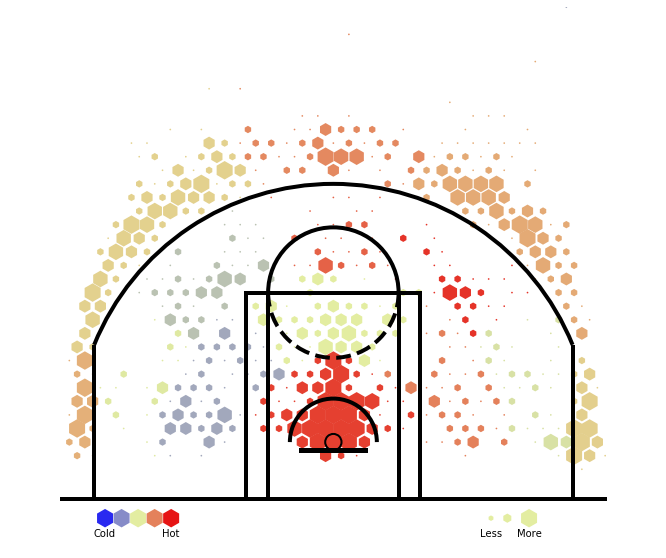

In [19]:
plot_team_compare.grantland_shotchart(post,reg)

In [ ]:
#tool I used to go to shotchart url and pull it down manually 
shot_chart_url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS='+\
'2014-15'+\
'&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season='+\
'2014-15'+\
'&SeasonSegment=&SeasonType='+ \
'Regular+Season' + \
'&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID='+\
'0'+\
'&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
print(shot_chart_url)

In [ ]:
'''Team IDs
Warriors = 1610612744
Rockets = 1610612745
Celtics = 1610612738
'''